
# AUTHOR SNEHA TD

# TECHNICAL TASK 1 - PREDICTION USING SUPERVISED ML(LEVEL: BEGINNER)




# Importing the Scientific Computing Library PANDAS which offers Data Structure and Tools for effective Data.¶

In [1]:
import pandas as pd

In [2]:
url= "http://bit.ly/w-data"

In [26]:
df= pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# In pandas we use dtypes to check the data types

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

# Statistical summary

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Check missing values

In [8]:
missing_df= df.notnull()
missing_df.head(10)

,Hours,Scores
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [9]:
for column in missing_df.columns.values.tolist():
    
    print(column)
    print(missing_df[column].value_counts())
    print("")

Hours
True    25
Name: Hours, dtype: int64

Scores
True    25
Name: Scores, dtype: int64



# Since we have no missing values in our dataset we can continue with our analysis



# Visualization using scatter plot.

In [10]:
%%capture
! pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt


Text(0, 0.5, 'Scores')

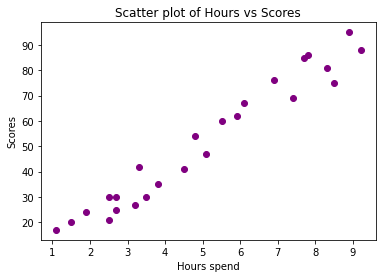

In [11]:
y=df["Scores"]
x=df["Hours"]
plt.scatter(x,y,color="Purple")
plt.title("Scatter plot of Hours vs Scores")
plt.xlabel("Hours spend")
plt.ylabel("Scores")


# From this we can clearly see that if Hours spend increases the scores increases ,hence there is a positive relationship between dependent variable(Scores) and independent variable(Hours).


# Now let us see about correlation between these two variables.


In [12]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Now let us measure the strength of the correlation by pearson correlation.

In [13]:
from scipy import stats

In [14]:
pearson_coef,p_value= stats.pearsonr(df["Hours"],df["Scores"])
print("The pearson correlation coefficient:",pearson_coef, "with a p_value of =",p_value)

The pearson correlation coefficient: 0.9761906560220884 with a p_value of = 9.132624467460325e-17


# Since our pearson correlation coefficient is almost equal to 1 and Probability value is less than 0.001,we can clearly that there is a very strong relationship between the Explanatory variable(Hours) and Response variable(Scores). 

# We split the data into train data and test data for training and testing.


In [15]:
x=df[["Hours"]]
y=df["Scores"]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print("Number of test sample=",x_test.shape[0])
print("Number of train sample=",x_train.shape[0])

Number of test sample= 8
Number of train sample= 17


In [17]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train,y_train)

LinearRegression()

(0.0, 101.91264482772135)

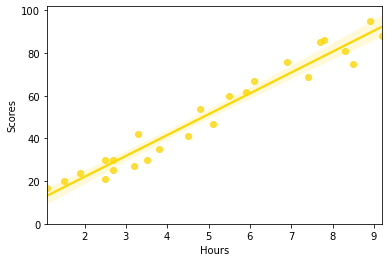

In [18]:
sns.regplot(x="Hours",y="Scores",data=df,color="gold")
plt.ylim(0,)

# Prediction using test data

In [19]:
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9
22,3.8
17,1.9
24,7.8


In [20]:
y_hat=lre.predict(x_test)
y_hat

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

(0.0, 89.7754452957974)

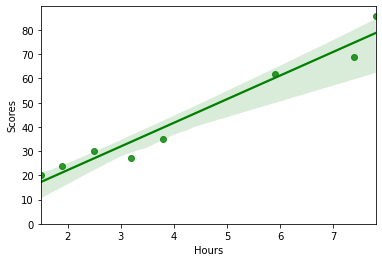

In [21]:
sns.regplot(x=x_test,y=y_test,data=df,color="g")
plt.ylim(0,)

In [22]:
df=pd.DataFrame({"Actual":y_test,"Predicted":y_hat})
df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


<AxesSubplot:>

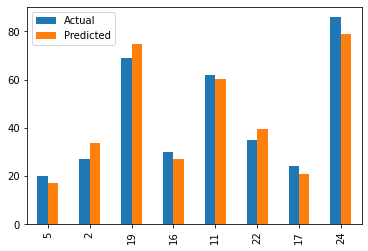

In [23]:
df.plot(kind="bar")

  # Now we can group the values to bin to make the data more clear. 

In [24]:
import numpy as np

In [27]:
bins=np.linspace(min(df["Scores"]),max(df["Scores"]),4)
bins

array([17., 43., 69., 95.])

In [28]:
group_names=["Low","Medium","High"]
df["Scores_binned"]=pd.cut(df["Scores"], bins,labels=group_names,include_lowest=True)
df[["Scores_binned"]].head()

,Scores_binned
0,Low
1,Medium
2,Low
3,High
4,Low


In [29]:
df["Scores_binned"].value_counts()

Low       12
High       7
Medium     6
Name: Scores_binned, dtype: int64

<BarContainer object of 3 artists>

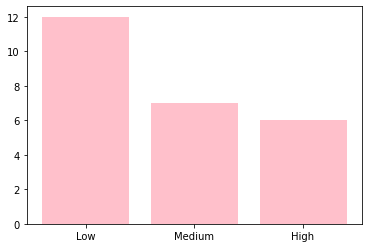

In [31]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.bar(group_names,df["Scores_binned"].value_counts(),color="pink")

In [32]:
from sklearn.metrics import mean_absolute_error
abs_error=mean_absolute_error(y_test,y_hat)
print("Mean Absolute Error=",abs_error)

Mean Absolute Error= 4.419727808027652


In [33]:
from sklearn.metrics import mean_squared_error
sq_error=mean_squared_error(y_test,y_hat)
print("Mean Squared Error=",sq_error)

Mean Squared Error= 22.96509721270043


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [34]:
lre.predict(np.array(9.25).reshape(-1,1))

array([92.91505723])

# The predicted score if a student studies for 9.25 hrs will be 92.92.

.

# THANK YOU